In [9]:
import importlib
import pandas as pd
df = pd.read_csv('/Users/jimmyrasmussen/Dropbox/garmin/activities.csv')
df['start_day'] = pd.to_datetime(df['start_time']).dt.date
df.sort_values('start_day').tail()

,lap_number,start_time,total_timer_time,total_elapsed_time,total_distance,total_ascent,total_descent,max_heart_rate,avg_heart_rate,max_speed_mm_sec,total_strides,start_day
4515,1,2022-10-02 12:50:05,3486.170,3494.256,10606.51,452.0,449.0,NaN,NaN,3686.0,5136.0,2022-10-02
4031,1,2022-10-04 14:01:43,4973.019,4973.019,15121.34,536.0,530.0,NaN,NaN,3546.0,7192.0,2022-10-04
4737,1,2022-10-06 15:25:17,3102.431,3213.638,9060.99,357.0,347.0,165.0,133.0,3443.0,4516.0,2022-10-06
4011,1,2022-10-08 14:50:20,4629.789,4705.495,13404.22,434.0,411.0,153.0,134.0,3536.0,6758.0,2022-10-08
4478,1,2022-10-09 09:03:36,4167.408,4288.895,12715.75,431.0,400.0,159.0,142.0,3648.0,6179.0,2022-10-09


In [25]:
import funcs
activities = funcs.load_activities()
sum_by_week = funcs.get_sum_by_week(activities)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'max_colwidth', 800, 'display.width', 2000):
    print(sum_by_week[['distance', 'time', 'avg_pace']])

            distance            time        avg_pace
Year Week                                           
2020 1      30.94491 02:38:35.328000 00:05:07.492508
     2      47.32190 03:46:42.018000 00:04:47.436007
     3      43.65311 03:47:03.060000 00:05:12.075359
     4      49.83438 04:03:36.563000 00:04:53.302796
     5      49.92713 04:05:16.073000 00:04:54.751030
     6      41.69506 03:28:19.132000 00:04:59.774889
     7      45.71903 03:44:33.848000 00:04:54.709839
     8      44.39180 03:39:11.066000 00:04:56.249893
     9      37.00671 03:05:26.930000 00:05:00.673310
     10     45.79398 03:57:27.453000 00:05:11.120653
     11     49.52022 03:48:24.757000 00:04:36.750729
     12     47.97685 03:56:12.734000 00:04:55.407764
     13     44.74299 03:45:50.536000 00:05:02.852715
     14     44.63187 03:31:09.036000 00:04:43.856266
     15     58.28340 04:39:17.664000 00:04:47.520357
     16     58.52427 04:54:16.856000 00:05:01.701430
     17     36.95828 03:02:36.667000 00:04:56.

/Users/jimmyrasmussen/git/python-scratchpad/src/running/funcs.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_week = activities[activities.Year > 2019].groupby(by=['Year', 'Week'], as_index=True)['Year', 'Week', 'total_distance', 'total_timer_time'].sum()


In [25]:
print(activities.groupby(by=['Year', 'Week'], as_index=True)['total_distance', 'total_timer_time'].sum().sort_values('total_distance').to_string())

           total_distance  total_timer_time
Year Week                                  
2015 8            7998.43          2368.970
2022 10           8004.58          2543.064
     31           8541.07          2985.504
2015 53           9000.25          2639.716
2021 48          11000.01          3171.625
2017 46          11098.90          3326.358
2020 49          11217.75          3271.340
2022 52          12153.75          3694.755
     32          14159.41          4551.174
2021 45          14609.02          4989.318
2022 30          14859.82          4615.115
2019 34          15155.53          4597.209
2022 15          15402.33          4421.598
2015 5           15454.18          4094.451
2017 38          15947.45          5278.421
2018 51          16877.22          5234.774
2019 40          18013.22          5448.689
2022 25          18182.17          6099.387
2017 44          18454.20          5745.323
2022 35          18651.29          5846.521
     28          18996.09       

/Users/jimmyrasmussen/git/python-scratchpad/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


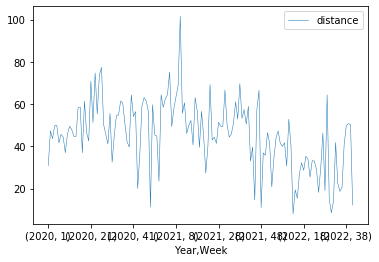

In [26]:
import matplotlib.pyplot as plt
sum_by_week[['distance']].plot(linewidth=0.5)

In [26]:
import funcs
importlib.reload(funcs)
activities = funcs.load_activities()
knee = funcs.load_knee_condition()
x = pd.merge(activities, knee, how='left', on=['start_day'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'max_colwidth', 800, 'display.width', 2000):
        print(x.sort_values('start_day').tail())
        print(knee.sort_values('start_day').tail())

   lap_number           start_time  total_timer_time  total_elapsed_time  total_distance  total_ascent  total_descent  max_heart_rate  avg_heart_rate  max_speed_mm_sec  total_strides   start_day  rating
3           6  2014-05-18 11:51:15           265.584             266.033         1000.00           2.0           19.0           162.0           160.0            4388.0            NaN  2014-05-18     NaN
4           7  2014-05-18 11:55:41           308.939             309.449         1000.00          29.0            2.0           166.0           162.0            4332.0            NaN  2014-05-18     NaN
5           8  2014-05-18 12:00:50           291.780             292.510         1000.00          21.0            0.0           164.0           160.0            3796.0            NaN  2014-05-18     NaN
6           9  2014-05-18 12:05:42           143.339             143.339          498.31           6.0            0.0           165.0           163.0            3606.0            NaN  2014